# Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

diabetesdf = pd.read_csv('combined_dataset.csv', na_filter = False)

#since we only need the 3rd column(Code), we will remove the Date and Time columns
diabetesdf.drop(diabetesdf.columns[[0,1]], axis = 1, inplace=True)
diabetesdf.to_csv('diabetesdf.csv', index=False)
diabetesdf

,Code,Value
0,58,100
1,33,9
2,34,13
3,62,119
4,33,7
...,...,...
29325,33,1
29326,34,7
29327,34,7
29328,34,7


# Exploratory Data Analysis (EDA)

In [11]:
print("The shape of the dataset is: ", diabetesdf.shape)
print("The information about the dataset: ", diabetesdf.info())

The shape of the dataset is:  (29330, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29330 entries, 0 to 29329
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Code    29330 non-null  int64 
 1   Value   29330 non-null  object
dtypes: int64(1), object(1)
memory usage: 458.4+ KB
The information about the dataset:  None


In [14]:
#this gives the datasets tendencies
diabetesdf.describe()

,Code
count,29330.000000
mean,46.428606
std,13.453219
min,0.000000
25%,33.000000
50%,48.000000
75%,60.000000
max,72.000000


In [16]:
#this finds the number of empty points in the dataset
diabetesdf.isnull().sum()

Code     0
Value    0
dtype: int64

In [17]:
#this shows the how many rows of data there are
print("Number of samples in this dataset are: ", len(diabetesdf))

#this finds the unique values among the code column
code_values = diabetesdf['Code'].unique()
print("The unique values among the Code column are:", code_values)

#this finds the unique values among the Value column
unique_values = diabetesdf['Value'].unique()
print("The unique numbers from the Value column are:", unique_values)

Number of samples in this dataset are:  29330
The unique values among the Code column are: [58 33 34 62 48 65 60 35 56 64 61 67 63 57 72 68 69 59 71 70 66  4 36  0]
The unique numbers from the Value column are: ['100' '9' '13' '119' '7' '123' '216' '10' '2' '211' '257' '11' '129'
 '239' '14' '4' '340' '5' '67' '206' '288' '77' '228' '259' '256' '8'
 '109' '96' '200' '128' '0' '192' '263' '81' '179' '88' '185' '104' '86'
 '60' '163' '147' '207' '305' '151' '85' '133' '63' '183' '282' '91' '229'
 '121' '251' '135' '87' '255' '343' '97' '136' '82' '110' '236' '175'
 '108' '300' '76' '65' '43' '130' '6' '182' '117' '75' '69' '201' '244'
 '125' '92' '122' '162' '270' '297' '148' '79' '246' '165' '149' '232'
 '312' '115' '180' '295' '15' '220' '64' '94' '273' '240' '217' '187' '3'
 '46' '127' '313' '102' '134' '103' '120' '227' '16' '105' '287' '113'
 '142' '173' '70' '153' '141' '146' '202' '111' '212' '171' '107' '35'
 '156' '106' '55' '204' '74' '233' '194' '159' '164' '72' '139' '68' '26

In [18]:
#this counts the number of occurences for each unique Code value
diabetesdf['Code'].value_counts()

33    9518
34    3830
58    3518
62    3160
60    2771
48    1883
35    1053
57     990
64     904
65     331
67     326
63     219
66     154
70     139
56     119
71      98
72      94
69      68
61      66
68      34
0       33
59      20
4        1
36       1
Name: Code, dtype: int64

In [19]:
diabetesdf['Value'].value_counts()

6      2043
0      1265
3      1194
4      1174
2      1049
       ... 
382       1
440       1
404       1
444       1
422       1
Name: Value, Length: 452, dtype: int64

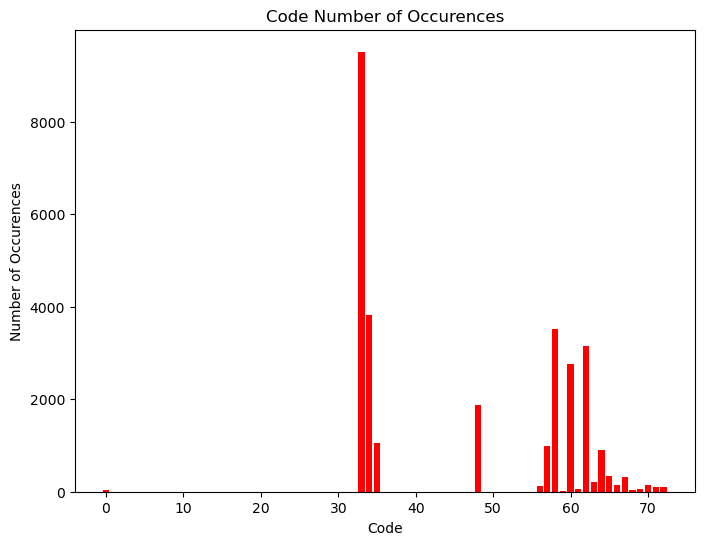

In [21]:
#this graph shows the number of occurences for the Code value on a bar graph

code_counts = diabetesdf['Code'].value_counts()

plt.figure(figsize = (8,6))
plt.bar(code_counts.index, code_counts, color = 'r')
plt.title('Code Number of Occurences')
plt.xlabel('Code')
plt.ylabel('Number of Occurences')
plt.show()

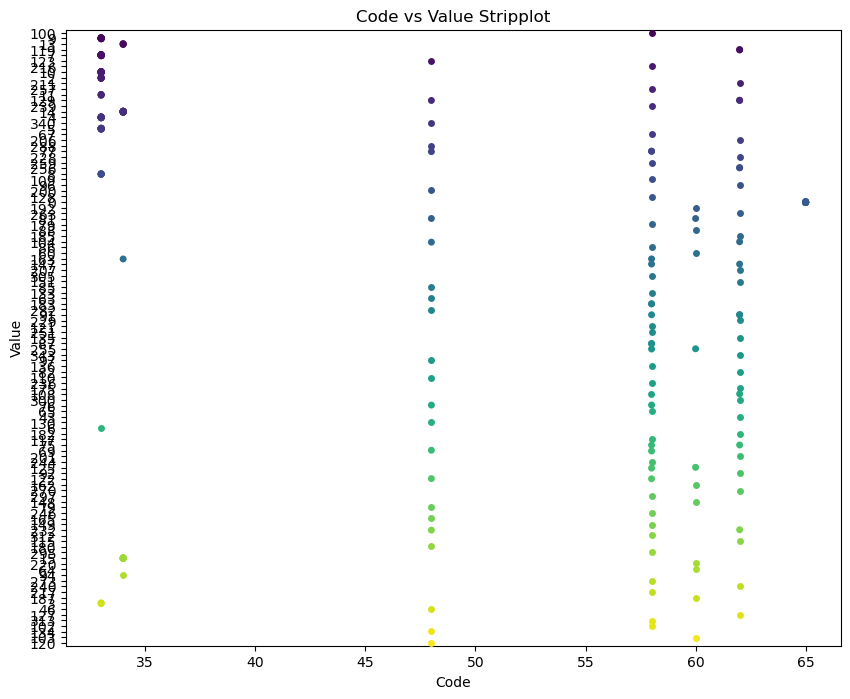

In [31]:
import seaborn as sns

#this plot shows the correlation between a Code occurence and its output Value
plt.figure(figsize = (10,8))
sns.stripplot(x = 'Code', y = 'Value', data = diabetesdf.head(300), palette = 'viridis')
plt.title('Code vs Value Stripplot')
plt.xlabel('Code')
plt.ylabel('Value')
plt.show()

# Converting the 'Code' column to one-hot encoding 

In [8]:
#this turns the original dataframe into a one-hot encoded one. Value remains same for each row.
#However, code only returns 1 if true for the Code column
diabetes_one_hot_data = pd.get_dummies(diabetesdf, columns = ['Code'])
diabetes_one_hot_data.to_csv('diabetes_one_hot_dataknn.csv', index=False)
diabetes_one_hot_data

,Value,Code_0,Code_4,Code_33,Code_34,Code_35,Code_36,Code_48,Code_56,Code_57,...,Code_63,Code_64,Code_65,Code_66,Code_67,Code_68,Code_69,Code_70,Code_71,Code_72
0,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29325,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29326,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29327,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29328,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 60-10-30% training validation set

In [17]:
from sklearn.model_selection import train_test_split

#this splits the training-validation-test sets into a 60-10-30% split
train_data, temp_data = train_test_split(diabetes_one_hot_data, test_size=0.4, random_state=42)
valid_data, test_data = train_test_split(temp_data, test_size=0.75, random_state=42)

#this splits the features
X_train = train_data.drop('Value', axis=1)
X_valid = valid_data.drop('Value', axis=1)
X_test = test_data.drop('Value', axis=1)

#this splits the Value variable since it is the target
y_train = train_data['Value']
y_valid = valid_data['Value']
y_test = test_data['Value']

#prints out shape of sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_valid.shape, y_valid.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (17598, 24) (17598,)
Validation set shape: (2933, 24) (2933,)
Test set shape: (8799, 24) (8799,)


In [18]:
train_data

,Value,Code_0,Code_4,Code_33,Code_34,Code_35,Code_36,Code_48,Code_56,Code_57,...,Code_63,Code_64,Code_65,Code_66,Code_67,Code_68,Code_69,Code_70,Code_71,Code_72
21140,220,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25070,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25928,164,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29166,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26709,18,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,202,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
860,15,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15795,119,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
valid_data

,Value,Code_0,Code_4,Code_33,Code_34,Code_35,Code_36,Code_48,Code_56,Code_57,...,Code_63,Code_64,Code_65,Code_66,Code_67,Code_68,Code_69,Code_70,Code_71,Code_72
19904,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21806,87,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
25627,79,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3073,3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27119,269,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19016,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18682,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25006,259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3901,78,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [20]:
test_data

,Value,Code_0,Code_4,Code_33,Code_34,Code_35,Code_36,Code_48,Code_56,Code_57,...,Code_63,Code_64,Code_65,Code_66,Code_67,Code_68,Code_69,Code_70,Code_71,Code_72
19504,133,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2968,155,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20851,2,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11032,136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22774,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21733,11,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7628,10,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2912,3,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17190,15,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# KNN Algorithm

In [23]:
import numpy as np
from tqdm import tqdm

#this calculates the euclidian_distance between two instances
def euclidian_distance(instance1, instance2):
    return np.sqrt(np.sum((instance1 - instance2) ** 2))

#this function takes the training data, Value as the target column, and the test data as inputs with 5 as a hyperparameter
#this will find the nearest neighbors and then predict the value based on those nearest neighbors
def knn_predict(train_data, target_column, data, k=5, subsample_fraction=0.1, num_rows_to_predict=8799):

    test_data_subsample = data.iloc[:num_rows_to_predict, :]
    
    distances = []

    #the reaosn for using tdqm was to track the progress of the predicition since there are a lot of rows
    for row_number, (_, test_instance) in enumerate(tqdm(test_data_subsample.iterrows(), total=len(test_data_subsample), desc="Predicting")):
        current_distances = []

        #this will use the euclidian distance function to calculate the test_data instance and training_data instance
        for i, train_instance in train_data.iterrows():
            distance = euclidean_distance(test_instance[1:], train_instance[1:])
            current_distances.append((distance, train_instance[target_column]))

        #this piece of code will sort the distance determine the nearest neighbor
        current_distances.sort(key=lambda x: x[0])
        neighbors = current_distances[:k]

        counts = {}
        for neighbor in neighbors:
            counts[neighbor[1]] = counts.get(neighbor[1], 0) + 1

        #this will return the row number
        yield counts, int(test_instance[target_column]), row_number

for probs, true_value, row_number in knn_predict(train_data, 'Value', test_data, k=5, subsample_fraction=0.1, num_rows_to_predict=8799):
    predicted_value = max(probs, key=probs.get)
    print(f"Predicted Value: {predicted_value}, True Value: {true_value}, Prediction for row number {row_number}")


Predicting:   0%|          | 1/8799 [00:17<42:21:02, 17.33s/it]

Predicted Value: 270, True Value: 133, Prediction for row number 0


Predicting:   0%|          | 2/8799 [00:34<42:08:35, 17.25s/it]

Predicted Value: 220, True Value: 155, Prediction for row number 1


Predicting:   0%|          | 3/8799 [00:51<42:05:43, 17.23s/it]

Predicted Value: 7, True Value: 2, Prediction for row number 2


Predicting:   0%|          | 4/8799 [01:09<42:10:34, 17.26s/it]

Predicted Value: 99, True Value: 136, Prediction for row number 3


Predicting:   0%|          | 5/8799 [01:26<42:19:31, 17.33s/it]

Predicted Value: 7, True Value: 13, Prediction for row number 4


Predicting:   0%|          | 6/8799 [01:43<42:18:25, 17.32s/it]

Predicted Value: 7, True Value: 5, Prediction for row number 5


Predicting:   0%|          | 7/8799 [02:01<42:17:50, 17.32s/it]

Predicted Value: 99, True Value: 108, Prediction for row number 6


Predicting:   0%|          | 7/8799 [02:05<43:37:21, 17.86s/it]


KeyboardInterrupt: 

Predicting (k=7): 100%|██████████| 2/2 [00:34<00:00, 17.27s/it]
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shrey\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Results for the first 2 rows:
{'true_positives': 0, 'false_positives': 6, 'true_negatives': 0, 'false_negatives': 0}

Metrics for the first 2 rows:
Precision: 0.0, Recall: 0.0, Weighted F1: 0.0, Recall F1: 0.0


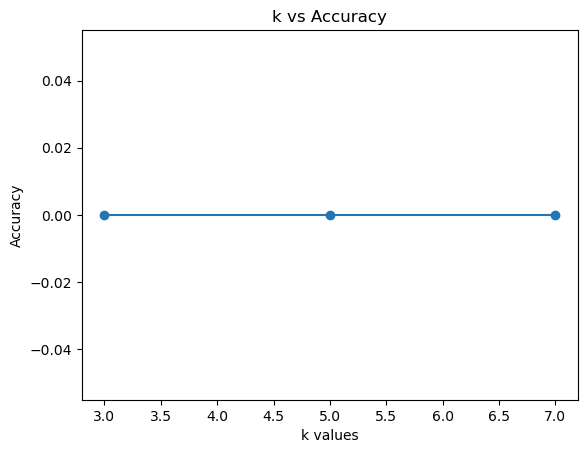

In [25]:
from tqdm import tqdm
from sklearn.metrics import precision_score, recall_score, f1_score


#I made another knn function to find the accuracy of the data but I only chose the first 2 rows of the test_data to predict
#this is due to the fact that my computer could not handle running so much
def knn_predict(train_data, target_column, data, k_values=[3, 5, 7], subsample_fraction=0.1, num_rows_to_predict=2):
    # Subsample the test data
    test_data_subsample = data.iloc[:num_rows_to_predict, :]
    
    results = {'true_positives': 0, 'false_positives': 0, 'true_negatives': 0, 'false_negatives': 0}

    k_vs_accuracy = {'k_values': [], 'accuracies': []}

    for k in k_values:
        accuracies = []

        #this code is the same as the last knn predicition function, just uses tqdm for progress tracking
        for row_number, (_, test_instance) in enumerate(tqdm(test_data_subsample.iterrows(), total=len(test_data_subsample), desc=f"Predicting (k={k})")):
            current_distances = []

            for i, train_instance in train_data.iterrows():
                distance = euclidean_distance(test_instance[1:], train_instance[1:])
                current_distances.append((distance, train_instance[target_column]))

            current_distances.sort(key=lambda x: x[0])
            neighbors = current_distances[:k]

            counts = {}
            for neighbor in neighbors:
                counts[neighbor[1]] = counts.get(neighbor[1], 0) + 1

            predicted_value = max(counts, key=counts.get)

            if row_number < 2:
                true_value = int(test_instance[target_column])
                if predicted_value == true_value:
                    results['true_positives'] += 1
                else:
                    results['false_positives'] += 1

            #this will calculate the accuracy of the predictions for the first 2 rows
            accuracies.append(1 if predicted_value == int(test_instance[target_column]) else 0)

        #calculates overall accuracies according to k values
        accuracy = sum(accuracies) / len(accuracies)
        k_vs_accuracy['k_values'].append(k)
        k_vs_accuracy['accuracies'].append(accuracy)

    #this calculates the precision, recall, weighted F1, and macro F1
    true_labels = [str(test_instance[target_column]) for _, test_instance in test_data_subsample.iterrows()]
    predicted_labels = []
    for _, test_instance in test_data_subsample.iterrows():
        current_distances = []

        for i, train_instance in train_data.iterrows():
            distance = euclidean_distance(test_instance[1:], train_instance[1:])
            current_distances.append((distance, str(train_instance[target_column])))

        current_distances.sort(key=lambda x: x[0])
        neighbors = current_distances[:k]

        counts = {}
        for neighbor in neighbors:
            counts[neighbor[1]] = counts.get(neighbor[1], 0) + 1

        predicted_value = max(counts, key=counts.get)
        predicted_labels.append(predicted_value)


    precision = precision_score(true_labels, predicted_labels, average='weighted')
    recall = recall_score(true_labels, predicted_labels, average='weighted')
    weighted_f1 = f1_score(true_labels, predicted_labels, average='weighted')
    recall_f1 = f1_score(true_labels, predicted_labels, average='macro')

    print("Results for the first 2 rows:")
    print(results)
    print("\nMetrics for the first 2 rows:")
    print(f"Precision: {precision}, Recall: {recall}, Weighted F1: {weighted_f1}, Recall F1: {recall_f1}")

    return results, k_vs_accuracy

results, k_vs_accuracy = knn_predict(train_data, 'Value', test_data, k_values=[3, 5, 7], subsample_fraction=0.1, num_rows_to_predict=2)

#this plots the k parameter vs accuracy graph
plt.plot(k_vs_accuracy['k_values'], k_vs_accuracy['accuracies'], marker='o')
plt.title('k vs Accuracy')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.show()
